#Importing Libraries


####Basic

In [9]:
import numpy as np
import pandas as pd

####Visualization

In [10]:
## Seaborn is a library for making statistical graphics in Python.
import seaborn as sns
import matplotlib.pyplot as plt

####Data-Preprocessing

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively.

##Importing Various Models

In [12]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, SGDRegressor,MultiTaskLasso,MultiTaskElasticNet
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor

####Evaluation

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Importing Dataset from local drive

In [14]:
! gdown 19WiV04PNWUmhgSJSi6KA4O4RBpfiBi46

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
df = pd.read_csv("steel_strength.csv")
df.head()

,formula,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [16]:
df.shape

(312, 18)

In [17]:
# Droping Formula column
df = df.drop(['formula'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [19]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

In [20]:
df = df.fillna(df.mean())

In [21]:
df.isna().sum()

Fe                  0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fe                312 non-null    float64
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        312 non-null    float64
dt

#Correlation among parameters

<Axes: >

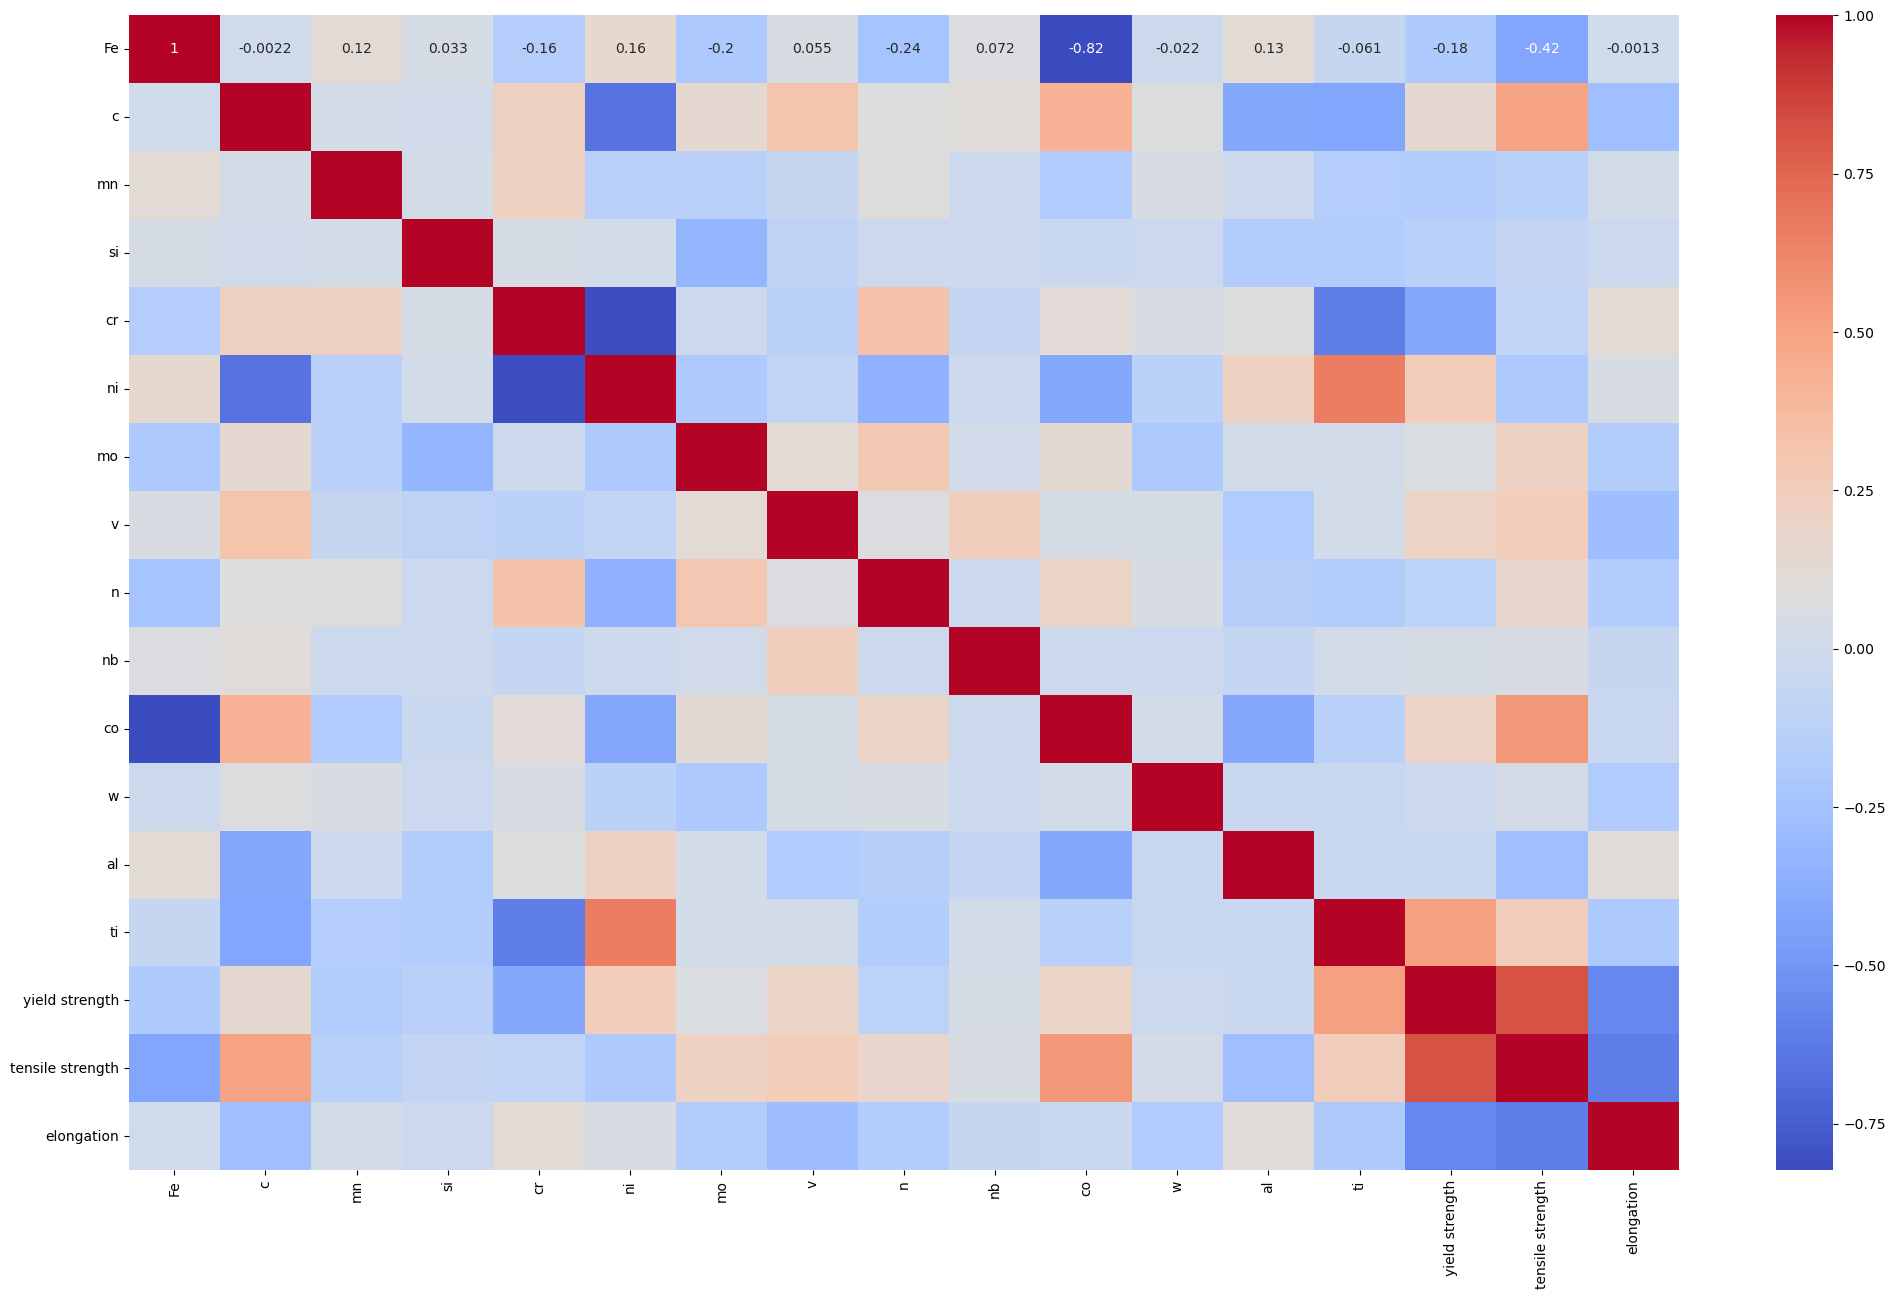

In [23]:
correlation = df.corr()
plt.subplots(figsize=(25,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='coolwarm')

#Standardizing the Data

In [24]:
X = df.iloc[:,0:14] #Feature Columns
y = df.iloc[:,14:]  #Target Columns

In [25]:
X.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55
1,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00
2,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57
3,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47
4,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55


In [26]:
y.head()

,yield strength,tensile strength,elongation
0,2411.5,2473.5,7.000000
1,1123.1,1929.2,8.000000
2,1736.3,1871.8,14.007261
3,2487.3,2514.9,9.000000
4,2249.6,2315.0,8.500000


Scaling of data

In [27]:
sc = MinMaxScaler()

X_scaled = pd.DataFrame(sc.fit_transform(X),columns=X.columns);
y_scaled = pd.DataFrame(sc.fit_transform(y),columns=y.columns);

In [28]:
X_scaled.head()

,Fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,0.000000,0.046512,0.013378,0.008439,0.000000,0.938066,0.303627,0.002315,0.000000,0.004,0.746142,0.000000,0.078212,0.620
1,0.018634,0.418605,0.000000,0.000000,0.767867,0.000000,0.309845,0.106481,0.266667,0.004,0.968143,0.255991,0.016760,0.000
2,0.064441,0.000000,0.000000,0.000000,0.495140,0.640305,0.082902,0.002315,0.000000,0.004,0.691389,0.000000,0.212291,0.228
3,0.043090,0.023256,0.013378,0.008439,0.000000,0.842782,0.407254,0.002315,0.000000,0.004,0.746142,0.000000,0.067039,0.588
4,0.074922,0.023256,0.013378,0.008439,0.000000,0.923773,0.148187,0.002315,0.000000,0.004,0.741165,0.000000,0.067039,0.620


In [29]:
y_scaled.head()

,yield strength,tensile strength,elongation
0,0.934326,0.937782,0.151515
1,0.077905,0.586847,0.181818
2,0.485509,0.549839,0.363856
3,0.984712,0.964475,0.212121
4,0.826708,0.835590,0.196970


Splitting of data

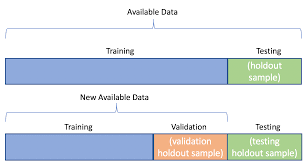

In [30]:
from sklearn.model_selection import train_test_split

X_new,X_test,y_new,y_test = train_test_split(X_scaled,y_scaled,test_size=0.1,random_state=1);
X_train,X_valid,y_train,y_valid = train_test_split(X_new,y_new,test_size=0.2,random_state=1)

[X_train.shape,y_train.shape],[X_valid.shape,y_valid.shape],[X_test.shape,y_test.shape]

([(224, 14), (224, 3)], [(56, 14), (56, 3)], [(32, 14), (32, 3)])

In [31]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (224, 14) (224, 3)
Validation set shape: (56, 14) (56, 3)
Test set shape: (32, 14) (32, 3)


In [32]:
y_Test = sc.inverse_transform(y_test)
actual_yield_strength = np.transpose(y_Test)[0]
actual_tensile_strength = np.transpose(y_Test)[1]
actual_pct_elongation = np.transpose(y_Test)[2]

In [33]:
actual_yield_strength

array([1680.6, 1150.6, 1860.3, 1297.5, 1287.3, 1012.8, 1139.7, 1340.8,
       1404.2, 1088.6, 1172. , 1792.2, 1768. , 1131.9, 1429.7, 1376.7,
       1026.6, 1819. , 1846.5, 1592.9, 1071.4, 1010.8, 1603.3, 1615.8,
       2331.1, 1414.5, 1308. , 1371.1, 1486.2, 1455.4, 1280.2, 1309.1])

#Modelling

###Regression using Sklearn models

In order to find out the baseline models for the data, a spot checking method is being used

In [34]:
import xgboost as xgb

def model_results(XTrain,XValid,yTrain,yValid):
  models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XValid)
      r2score = r2_score(yValid, model_results)
      RMSE = mean_squared_error(yValid, model_results,squared = False)
      MAE = mean_absolute_error(yValid, model_results)
      finalResults.append((name, r2score, RMSE, MAE))

  finalResults.sort(key=lambda k:k[2])
  return finalResults

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
np.random.seed(42)
np_results = model_results(X_train,X_valid,y_train,y_valid)
results = pd.DataFrame(np_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
results

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.818438,0.079679,0.052458
1,X_gb,0.790051,0.084026,0.058144
2,Random Forest,0.769904,0.087501,0.059861
3,Support Vector,0.747576,0.091883,0.066530
4,AdaBoost,0.703198,0.099494,0.074959
5,Decision Tree,0.705568,0.105678,0.068488
6,KNN,0.691688,0.106212,0.071565
7,Linear,0.581041,0.122134,0.083332
8,MLP,0.554804,0.126936,0.086568
9,RidgeCV,0.539772,0.129265,0.087283


In [ ]:
import xgboost as xgb

def model_test_results(XTrain,XTest,yTrain,yTest):
  test_models =[('Linear', LinearRegression()),
           ('Random Forest',RandomForestRegressor()),
           ('MLP',MLPRegressor(max_iter = 1000)),
           ('RidgeCV',MultiOutputRegressor(RidgeCV())),
           ('SGD',MultiOutputRegressor(SGDRegressor())),
           ('KNN', KNeighborsRegressor(n_neighbors=10)),
           ('Support Vector',MultiOutputRegressor(SVR())),
           ('Decision Tree',MultiOutputRegressor(DecisionTreeRegressor())),
           ('AdaBoost',MultiOutputRegressor(AdaBoostRegressor())),
           ('X_gb',MultiOutputRegressor(xgb.XGBRegressor())),
           ('GradientBoost',MultiOutputRegressor(GradientBoostingRegressor())),
          ]
  finalResults = []

  for name,model in test_models:
      model.fit(XTrain, yTrain)
      model_results = model.predict(XTest)
      r2score = r2_score(yTest, model_results)
      RMSE = mean_squared_error(yTest, model_results,squared = False)
      MAE = mean_absolute_error(yTest, model_results)
      finalResults.append((name, r2score, RMSE, MAE))
  finalResults.sort(key=lambda k:k[2])
  return finalResults

In [ ]:
np.random.seed(42)
np__test_results = model_test_results(X_train,X_test,y_train,y_test)
test_results = pd.DataFrame(np__test_results,columns=['Model Name', 'R2 Score', 'RMSE', 'MAE'])
test_results

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.676962,0.112549,0.079148
1,AdaBoost,0.648129,0.117772,0.084849
2,X_gb,0.642697,0.117793,0.078075
3,KNN,0.620112,0.123067,0.088074
4,Random Forest,0.603458,0.123595,0.084284
5,Support Vector,0.606301,0.124001,0.087908
6,Decision Tree,0.535894,0.134413,0.090048
7,MLP,0.439534,0.149486,0.108272
8,Linear,0.379561,0.158148,0.112923
9,RidgeCV,0.368985,0.159476,0.115806


In [ ]:
names = []
r2score = []
rmse = []
mae = []
for model in np_results:
  names.append(model[0])
  r2score.append(model[1])
  rmse.append(model[2])
  mae.append(model[3])

Text(0.5, 1.0, 'r2score comparison')

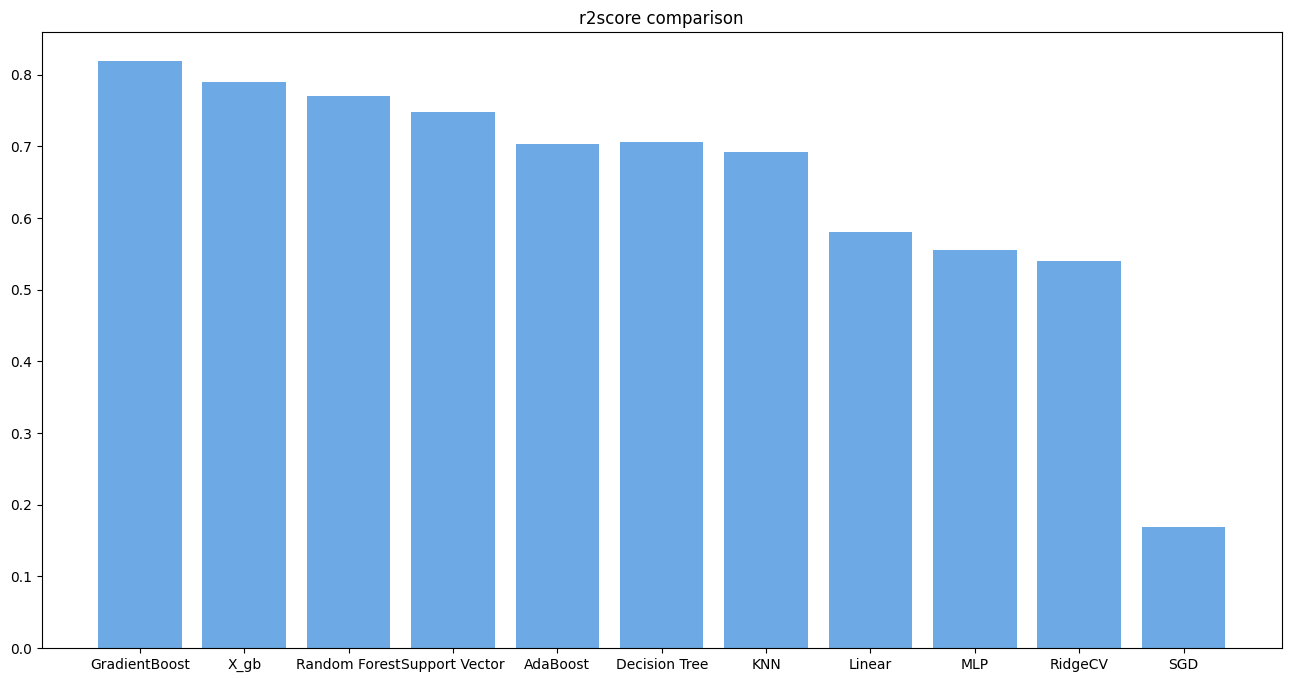

In [ ]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,r2score,width=0.8,color='#6DA9E4')
plt.title('r2score comparison')

Text(0.5, 1.0, 'rmse comparison')

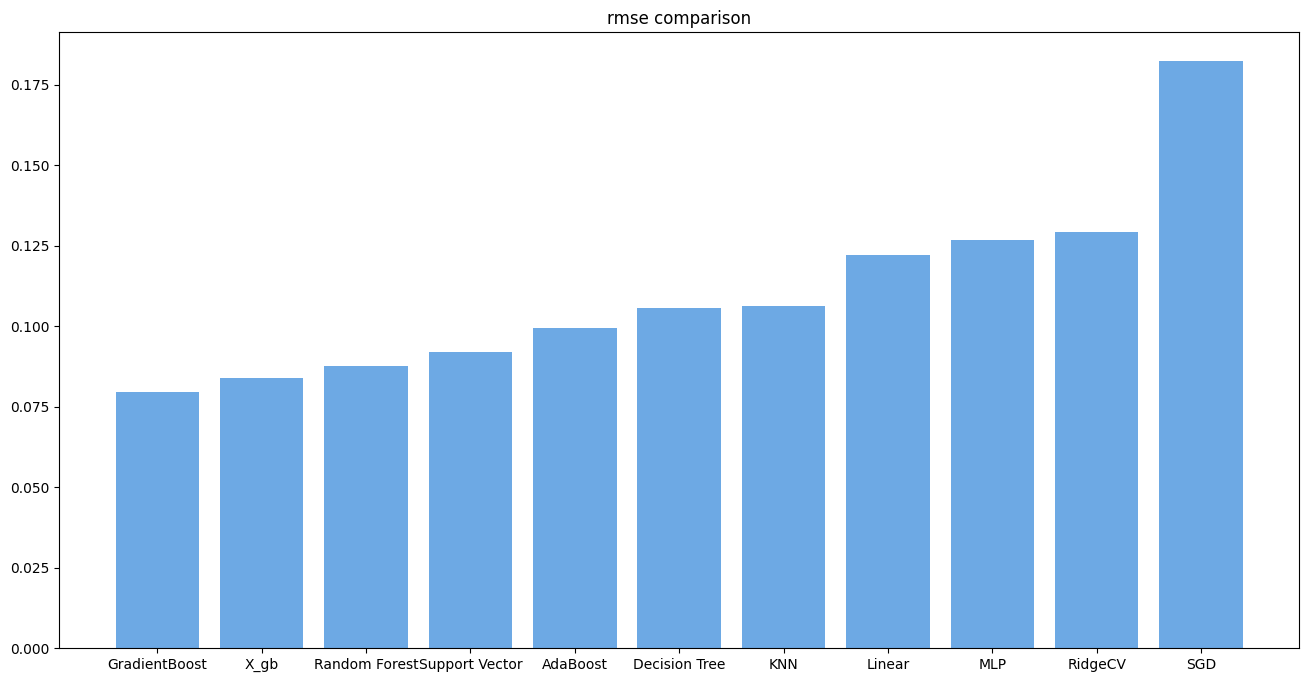

In [ ]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,rmse,width=0.8,color='#6DA9E4')
plt.title('rmse comparison')

Text(0.5, 1.0, 'mae comparison')

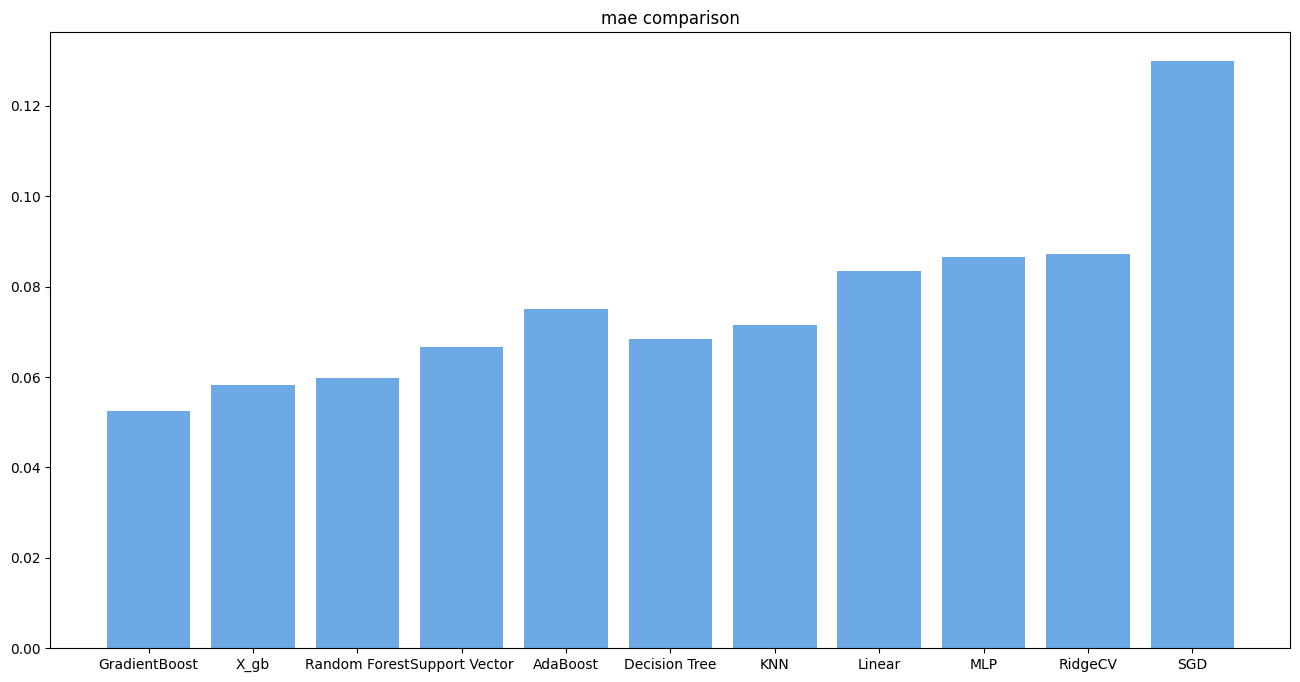

In [ ]:
fig = plt.figure(figsize = (16, 8))
plt.bar(names,mae,width=0.8,color='#6DA9E4')
plt.title('mae comparison')

In [ ]:
Final_models = results.iloc[:1,:]

In [ ]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.818438,0.079679,0.052458




---



---



###Regression using Neural Network

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=14, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(3, activation='linear'))

model.compile(loss=keras.losses.mse,
                 optimizer=keras.optimizers.Adam(),
                 metrics=["mse"])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 128, shuffle=True, epochs=500)

Epoch 1/500
2/2 [==============================] - 2s 28ms/step - loss: 0.1327 - mse: 0.1327
Epoch 2/500
2/2 [==============================] - 0s 13ms/step - loss: 0.0587 - mse: 0.0587
Epoch 3/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0481 - mse: 0.0481
Epoch 4/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0500 - mse: 0.0500
Epoch 5/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0430 - mse: 0.0430
Epoch 6/500
2/2 [==============================] - 0s 10ms/step - loss: 0.0321 - mse: 0.0321
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0260 - mse: 0.0260
Epoch 8/500
2/2 [==============================] - 0s 12ms/step - loss: 0.0253 - mse: 0.0253
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0263 - mse: 0.0263
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 0.0259 - mse: 0.0259
Epoch 11/500
2/2 [==============================] - 0s 11ms/step - lo

In [ ]:
y_pred = model.predict(X_valid)

2/2 [==============================] - 0s 7ms/step


In [ ]:
NN_res = {'Model Name':'Neural Network',	'R2 Score':	r2_score(y_valid, y_pred),'RMSE':mean_squared_error(y_valid, y_pred,squared = False), 'MAE':mean_absolute_error(y_valid, y_pred)}

In [ ]:
Final_models = Final_models.append(NN_res,ignore_index=True);

<ipython-input-59-1ea1a2758b65>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Final_models = Final_models.append(NN_res,ignore_index=True);


In [ ]:
Final_models

,Model Name,R2 Score,RMSE,MAE
0,GradientBoost,0.818438,0.079679,0.052458
1,Neural Network,0.750373,0.090027,0.056899




---



---



In [ ]:
NN_test_y_pred = model.predict(X_test)

1/1 [==============================] - 0s 26ms/step


In [ ]:
NN_Final_results = {'r2score':r2_score(y_test,NN_test_y_pred),'rmse':mean_squared_error(y_test,NN_test_y_pred,squared=False),'mae':mean_absolute_error(y_test,NN_test_y_pred)}
NN_Final_results

{'r2score': 0.6834436113360548,
 'rmse': 0.10819282543616952,
 'mae': 0.07604098863468982}

#Gradient Boosting Regressor

##Parameters:<br>
1. **Boosting Parameters** : These affect the boosting operation in the model.
2. **Tree-Specific Parameters** : These affect each individual tree in the model.

3. **Miscellaneous Parameters** : Other parameters for overall functioning.

#### >>> Boosting Parameters
* ***learning_rate*** : <br>
This determines the impact of each tree on the final outcome. GBR works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.<br>
Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
* ***n_estimators***
The number of sequential trees to be modeled.
Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using cross validation for a particular learning rate.
* ***subsample***
The fraction of observations to be selected for each tree. Selection is done by random sampling.
Values slightly less than 1 make the model robust by reducing the variance.
Typical values ~0.8 generally work fine but can be fine-tuned further.

#### >>> Tree-specific Parameters

* ***min_samples_split*** :<br>
Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.<br>
Too high values can lead to under-fitting hence, it should be tuned using cross validation.
* ***max_leaf_nodes*** :<br>
The maximum number of terminal nodes or leaves in a tree.


#### >>> Miscellaneous Parameters
* ***loss*** :<br>
It refers to the loss function to be minimized in each split.
It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.
* ***random_state*** :<br>
The random number seed so that same random numbers are generated every time.
This is important for parameter tuning. If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
* ***criterion*** :<br>
The function used to measure the quality of a split


## Boosting Parameters

###learning_rate

In [ ]:
def parameter_LR(XTrain,yTrain,XValid,yValid):
  LR = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.55,0.573,0.5,0.6,0.7,0.8,0.9,1]
  Results = []
  for lr in LR:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = lr))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = mean_squared_error(yValid,y_pred,squared = False)
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((lr, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['LR', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_LR = parameter_LR(X_train,y_train,X_valid,y_valid)
Results_LR

,LR,R2 Score,RMSE,MAE
0,0.2000,0.827410,0.077516,0.051334
1,0.1000,0.824548,0.078832,0.052412
2,0.3000,0.807809,0.081487,0.056379
3,0.5730,0.788567,0.082625,0.058680
4,0.4000,0.789174,0.084716,0.057917
5,0.6000,0.781913,0.086414,0.062276
6,0.5500,0.769616,0.087445,0.062632
7,0.5000,0.772225,0.087830,0.059633
8,0.7000,0.759409,0.092230,0.066015
9,0.8000,0.643054,0.109846,0.076290


In [ ]:
best_LR = Results_LR.iloc[0,0]
best_LR

0.2

###n_estimators

In [ ]:
def parameter_estimator(XTrain,yTrain,XValid,yValid):
  estimators = [100,200,300,400,500,700,1000]
  Results = []
  for estimator in estimators:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1,learning_rate = best_LR,n_estimators = estimator))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    r2score = r2_score(y_valid,y_pred)
    RMSE = mean_squared_error(y_valid,y_pred,squared = False)
    MAE = mean_absolute_error(y_valid,y_pred)
    Results.append((estimator, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['estimator', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_estimator = parameter_estimator(X_train,y_train,X_valid,y_valid)
Results_estimator

,estimator,R2 Score,RMSE,MAE
0,100,0.827410,0.077516,0.051334
1,300,0.823249,0.077555,0.052917
2,200,0.824009,0.077660,0.052540
3,400,0.822361,0.077716,0.053119
4,500,0.821869,0.077800,0.053175
5,700,0.821666,0.077821,0.053209
6,1000,0.821645,0.077824,0.053209


In [ ]:
best_n_estimator = Results_estimator.iloc[0,0]
best_n_estimator

100

###subsample

In [ ]:
def parameter_subsample(XTrain,yTrain,XValid,yValid):
  samples = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
  Results = []
  for x in samples:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator, subsample = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = mean_squared_error(yValid,y_pred,squared = False)
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['subsample', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_subsample = parameter_subsample(X_train,y_train,X_valid,y_valid)
Results_subsample

,subsample,R2 Score,RMSE,MAE
0,0.9,0.810451,0.076848,0.051132
1,1.0,0.827410,0.077516,0.051334
2,0.5,0.819602,0.078878,0.055474
3,0.8,0.806362,0.079305,0.052168
4,0.7,0.799817,0.081070,0.055348
5,0.6,0.794991,0.081162,0.055429
6,0.4,0.767849,0.086723,0.059080
7,0.3,0.746551,0.089558,0.065031
8,0.1,0.704180,0.102310,0.071601
9,0.2,0.698534,0.103412,0.071438


In [ ]:
best_subsample= Results_subsample.iloc[0,0]
best_subsample

0.9

## Tree-based Parameters

###min_samples_split

In [ ]:
def parameter_split(XTrain,yTrain,XValid,yValid):
  splits = [2,3,4,5,6,7,8,9,10]
  Results = []
  for x in splits:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = mean_squared_error(yValid,y_pred,squared = False)
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['min_sample_split', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_split = parameter_split(X_train,y_train,X_valid,y_valid)
Results_split

,min_sample_split,R2 Score,RMSE,MAE
0,7,0.833156,0.075583,0.050321
1,8,0.824035,0.076155,0.051969
2,10,0.823156,0.077180,0.051795
3,4,0.824505,0.077425,0.052540
4,2,0.827410,0.077516,0.051334
5,6,0.820712,0.078332,0.051886
6,5,0.824990,0.078367,0.053307
7,3,0.814184,0.078763,0.052358
8,9,0.818975,0.078765,0.052767


In [ ]:
best_split= Results_split.iloc[0,0]
best_split

7

###max_leaf_nodes

In [ ]:
def parameter_nodes(XTrain,yTrain,XValid,yValid):
  nodes = [2,3,4,5,6,7,8,9,10]
  Results = []
  for x in nodes:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split, max_leaf_nodes = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = mean_squared_error(yValid,y_pred,squared = False)
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['max_leaf_nodes', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_nodes = parameter_nodes(X_train,y_train,X_valid,y_valid)
Results_nodes

,max_leaf_nodes,R2 Score,RMSE,MAE
0,6,0.834456,0.075310,0.051172
1,8,0.835073,0.075413,0.050036
2,9,0.835073,0.075413,0.050036
3,10,0.835073,0.075413,0.050036
4,7,0.827248,0.076274,0.049995
5,5,0.829995,0.077111,0.051162
6,4,0.816675,0.080747,0.053650
7,3,0.792591,0.087478,0.059492
8,2,0.717731,0.103432,0.071302


In [ ]:
best_ln = Results_nodes.iloc[0,0]
best_ln

6

In [ ]:
# Results_features

In [ ]:
# best_max_features = Results_features.iloc[0,0]
# best_max_features

## Miscellaneous Parameters

###loss

In [ ]:
def parameter_loss(XTrain,yTrain,XValid,yValid):
  losses = ["squared_error","absolute_error","huber","quantile"]
  Results = []
  for x in losses:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln , loss = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = mean_squared_error(yValid,y_pred,squared = False)
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['Loss', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_loss = parameter_loss(X_train,y_train,X_valid,y_valid)

In [ ]:
Results_loss

,Loss,R2 Score,RMSE,MAE
0,squared_error,0.834456,0.075310,0.051172
1,huber,0.819344,0.080458,0.054149
2,absolute_error,0.770358,0.089755,0.060327
3,quantile,0.456935,0.137457,0.103061


In [ ]:
best_loss = Results_loss.iloc[0,0]
best_loss

'squared_error'

###criterion

In [ ]:
def parameter_criterion(XTrain,yTrain,XValid,yValid):
  criterion = ['friedman_mse', 'squared_error']
  Results = []
  for x in criterion:
    model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = x))
    model.fit(XTrain,yTrain)
    y_pred = model.predict(XValid)
    r2score = r2_score(yValid,y_pred)
    RMSE = mean_squared_error(yValid,y_pred,squared = False)
    MAE = mean_absolute_error(yValid,y_pred)
    Results.append((x, r2score, RMSE, MAE))
  Results.sort(key=lambda k:k[2])
  return pd.DataFrame(Results,columns=['subsample', 'R2 Score', 'RMSE', 'MAE'])

In [ ]:
Results_criterion = parameter_criterion(X_train,y_train,X_valid,y_valid)


In [ ]:
Results_criterion

,subsample,R2 Score,RMSE,MAE
0,friedman_mse,0.834456,0.075310,0.051172
1,squared_error,0.833910,0.075383,0.051172


In [ ]:
best_criterion = Results_criterion.iloc[0,0]
best_criterion

'friedman_mse'

#GB Tuned Results

### GB Tuned Parameters:



In [ ]:
print("Learning_Rate: ",best_LR)
print("n_estimator: ",best_n_estimator)
print("min_samples_split: ",best_split)
print("max_leaf_nodes: ",best_ln)
print("loss: ", best_loss)
print("Criterion: ",best_criterion)

In [ ]:
Final_validation_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = best_criterion))
Final_validation_model.fit(X_train,y_train)
final_validation_pred = Final_validation_model.predict(X_valid)

In [ ]:
Final_validation_results = {'r2score':r2_score(y_valid,final_validation_pred),'rmse':mean_squared_error(y_valid,final_validation_pred,squared=False),'mae':mean_absolute_error(y_valid,final_validation_pred)}
Final_validation_results

{'r2score': 0.8344558529540098,
 'rmse': 0.07531026277692604,
 'mae': 0.05117193087490962}

###Predictions

In [ ]:
Final_model = MultiOutputRegressor(GradientBoostingRegressor(random_state = 1, learning_rate = best_LR, n_estimators = best_n_estimator,min_samples_split=best_split,max_leaf_nodes = best_ln ,loss = best_loss,criterion = best_criterion))
Final_model.fit(X_train,y_train)
final_pred = Final_model.predict(X_test)

In [ ]:
Final_results = {'r2score':r2_score(y_test,final_pred),'rmse':mean_squared_error(y_test,final_pred,squared=False),'mae':mean_absolute_error(y_test,final_pred)}
Final_results

{'r2score': 0.6794367028735456,
 'rmse': 0.11089449683599743,
 'mae': 0.07884819641134708}

In [ ]:
Final_pred = sc.inverse_transform(final_pred)
GB_predicted_yield_strength = np.transpose(Final_pred)[0]
GB_predicted_tensile_strength = np.transpose(Final_pred)[1]
GB_predicted_pct_elongation = np.transpose(Final_pred)[2]

In [ ]:
Final_pred = pd.DataFrame(Final_pred,columns = y_test.columns)

In [ ]:
y_Test = pd.DataFrame(y_Test,columns = y_test.columns)


###Graphical Visualization

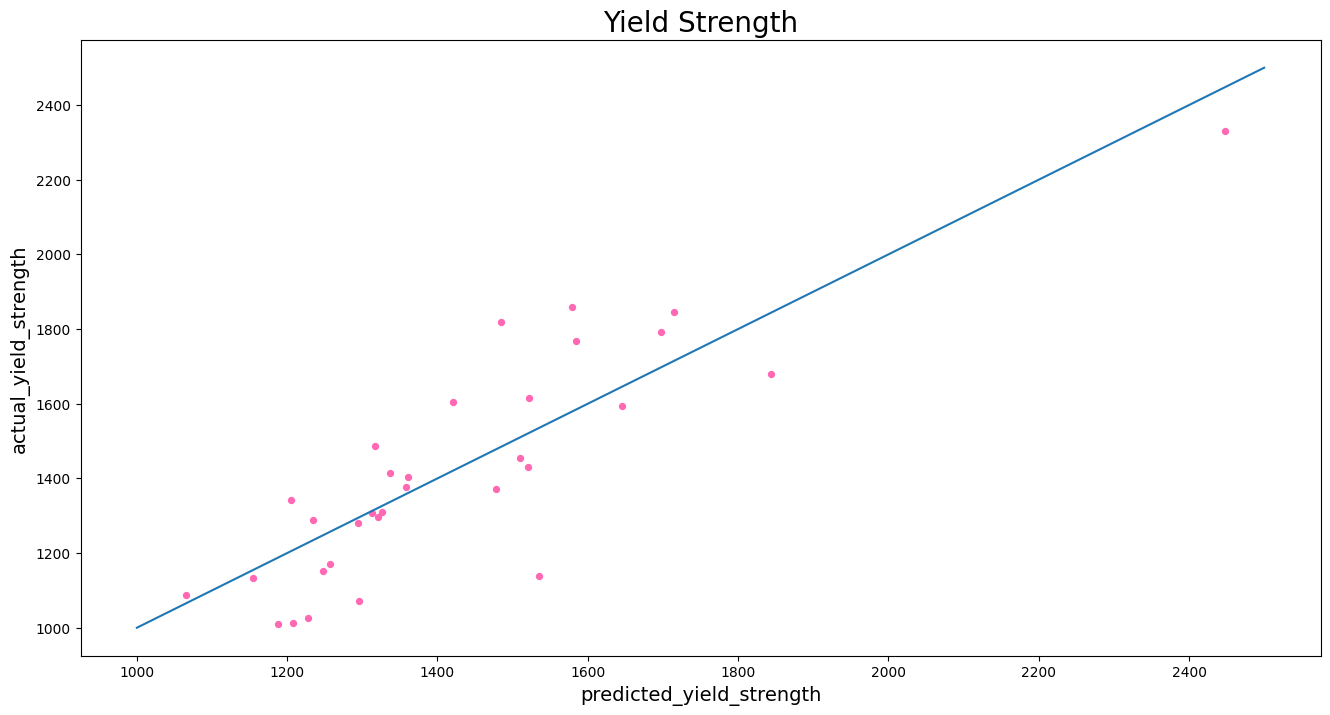

In [ ]:
fig ,(ax0) = plt.subplots(figsize=(16,8))
ax0.scatter(GB_predicted_yield_strength, actual_yield_strength, color = 'hotpink', s=18)
x3 = np.linspace(1000, 2500, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('Yield Strength', fontsize = 20)
ax0.set_xlabel('predicted_yield_strength', fontsize = 14)
ax0.set_ylabel('actual_yield_strength', fontsize = 14)
plt.show()

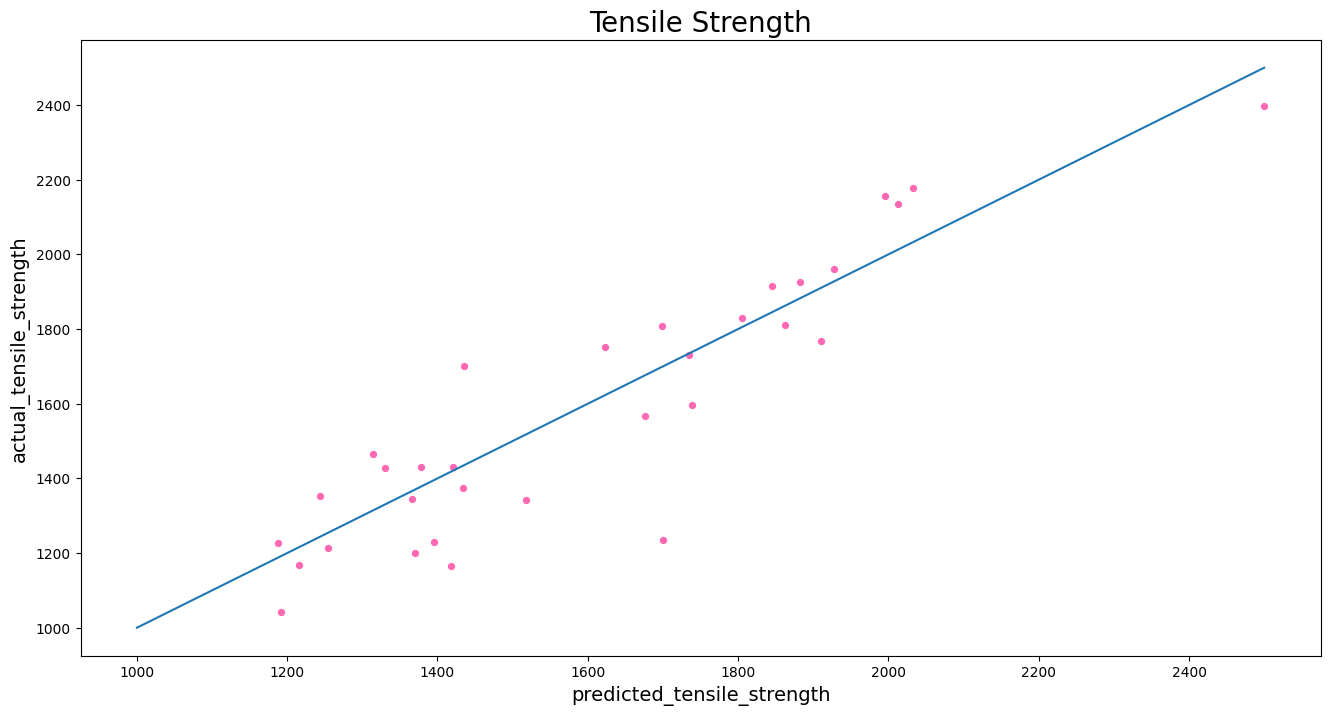

In [ ]:
fig ,(ax1) = plt.subplots(figsize=(16,8))
ax1.scatter(GB_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(1000, 2500, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

Text(0, 0.5, 'actual_pct_elongation')

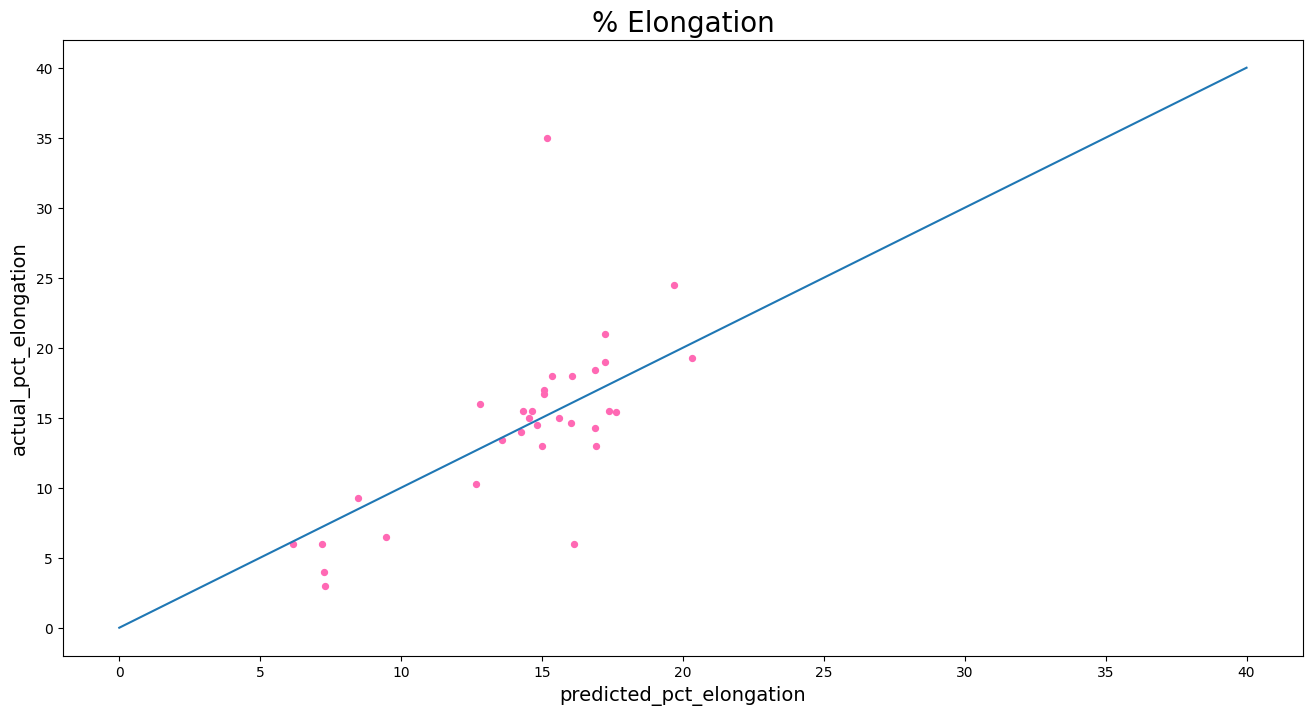

In [ ]:
fig ,(ax2) = plt.subplots(figsize=(16,8))
ax2.scatter(GB_predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 40, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)



---



---



---



---



# Random Forest Regressor Hypertuning

In [ ]:
rfr = RandomForestRegressor()
parameters = {
    "n_estimators":[5,10,50,75,100,200,300],
    "max_depth":[2,4,8,16,32,64,None]

}

In [ ]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfr,parameters,cv=10)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'n_estimators': [5, 10, 50, 75, 100, 200, 300]})

In [ ]:
best_params = cv.best_params_

In [ ]:
best_rfr = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                   max_depth=best_params['max_depth'])


In [ ]:
best_rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
y_rfr_pred = best_rfr.predict(X_test)

In [ ]:
Final_rfr_results = {'r2score':r2_score(y_test,y_rfr_pred),'rmse':mean_squared_error(y_test,y_rfr_pred,squared=False),'mae':mean_absolute_error(y_test,y_rfr_pred)}
Final_rfr_results

{'r2score': 0.615189403632886,
 'rmse': 0.12183245061833521,
 'mae': 0.0827363017782735}